In [ ]:
# !pip install imgaug
# !pip install numpy==1.26.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/asl-alphabet


In [ ]:
import os

train_data_path = os.path.join(path, 'asl_alphabet_train/asl_alphabet_train')
test_data_path = os.path.join(path, 'asl_alphabet_test/asl_alphabet_test')
categories = os.listdir(train_data_path)
print(categories)

['N', 'R', 'space', 'B', 'I', 'del', 'F', 'H', 'E', 'U', 'M', 'X', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', 'C', 'P', 'L', 'W', 'D', 'nothing', 'J']


# Visualize data
Visualize one image for each alphabet from the training dataset and display its corresponding label.

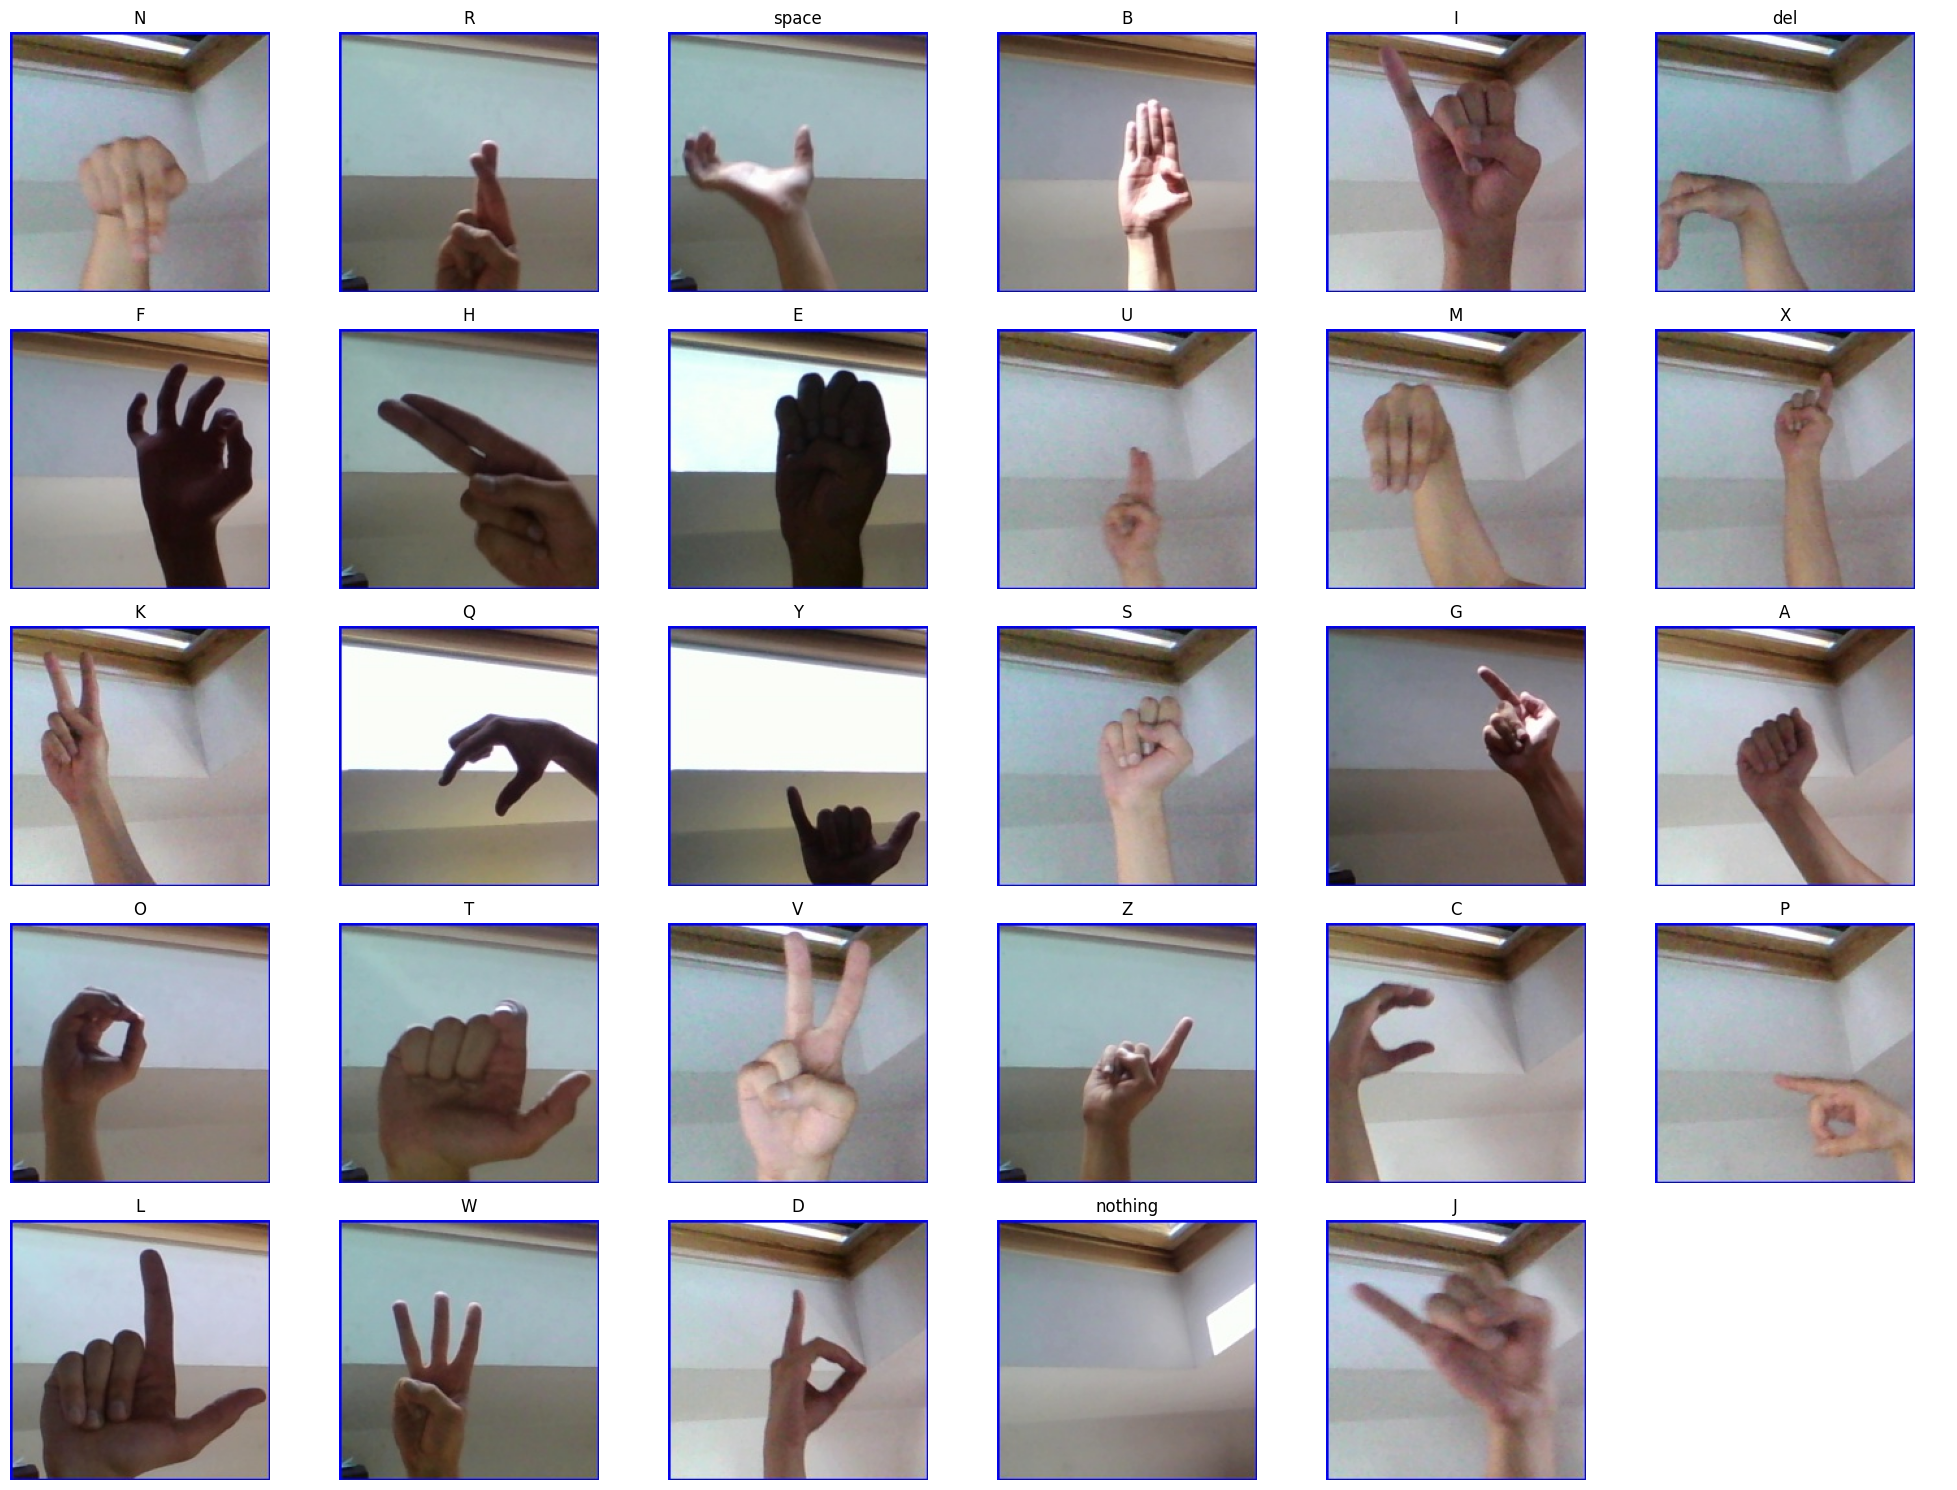

In [ ]:
import matplotlib.pyplot as plt
import cv2
import math

num_categories = len(categories)
cols = 6 # Number of columns in the subplot grid
rows = math.ceil(num_categories / cols) # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3)) # Adjust figure size

for i, category in enumerate(categories):
    category_path = os.path.join(train_data_path, category)
    image_files = os.listdir(category_path)
    if image_files:
        first_image_path = os.path.join(category_path, image_files[0])
        img = cv2.imread(first_image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols] # Get the correct axis
        ax.imshow(img_rgb)
        ax.set_title(category)
        ax.axis('off')

# Hide any unused subplots
for j in range(num_categories, rows * cols):
    ax = axes[j // cols, j % cols] if rows > 1 else axes[j % cols]
    ax.axis('off')


plt.tight_layout()
plt.show()

Visulaize locally sourced data


['B', 'del', 'H', 'G', 'D', 'C', 'A', 'F', 'E', 'I', 'Q', 'M', 'L', 'N', 'K', 'nothing', 'R', 'O', 'P', 'J', 'S', 'space', 'Z', 'V', 'X', 'T', 'U', 'W', 'Y']


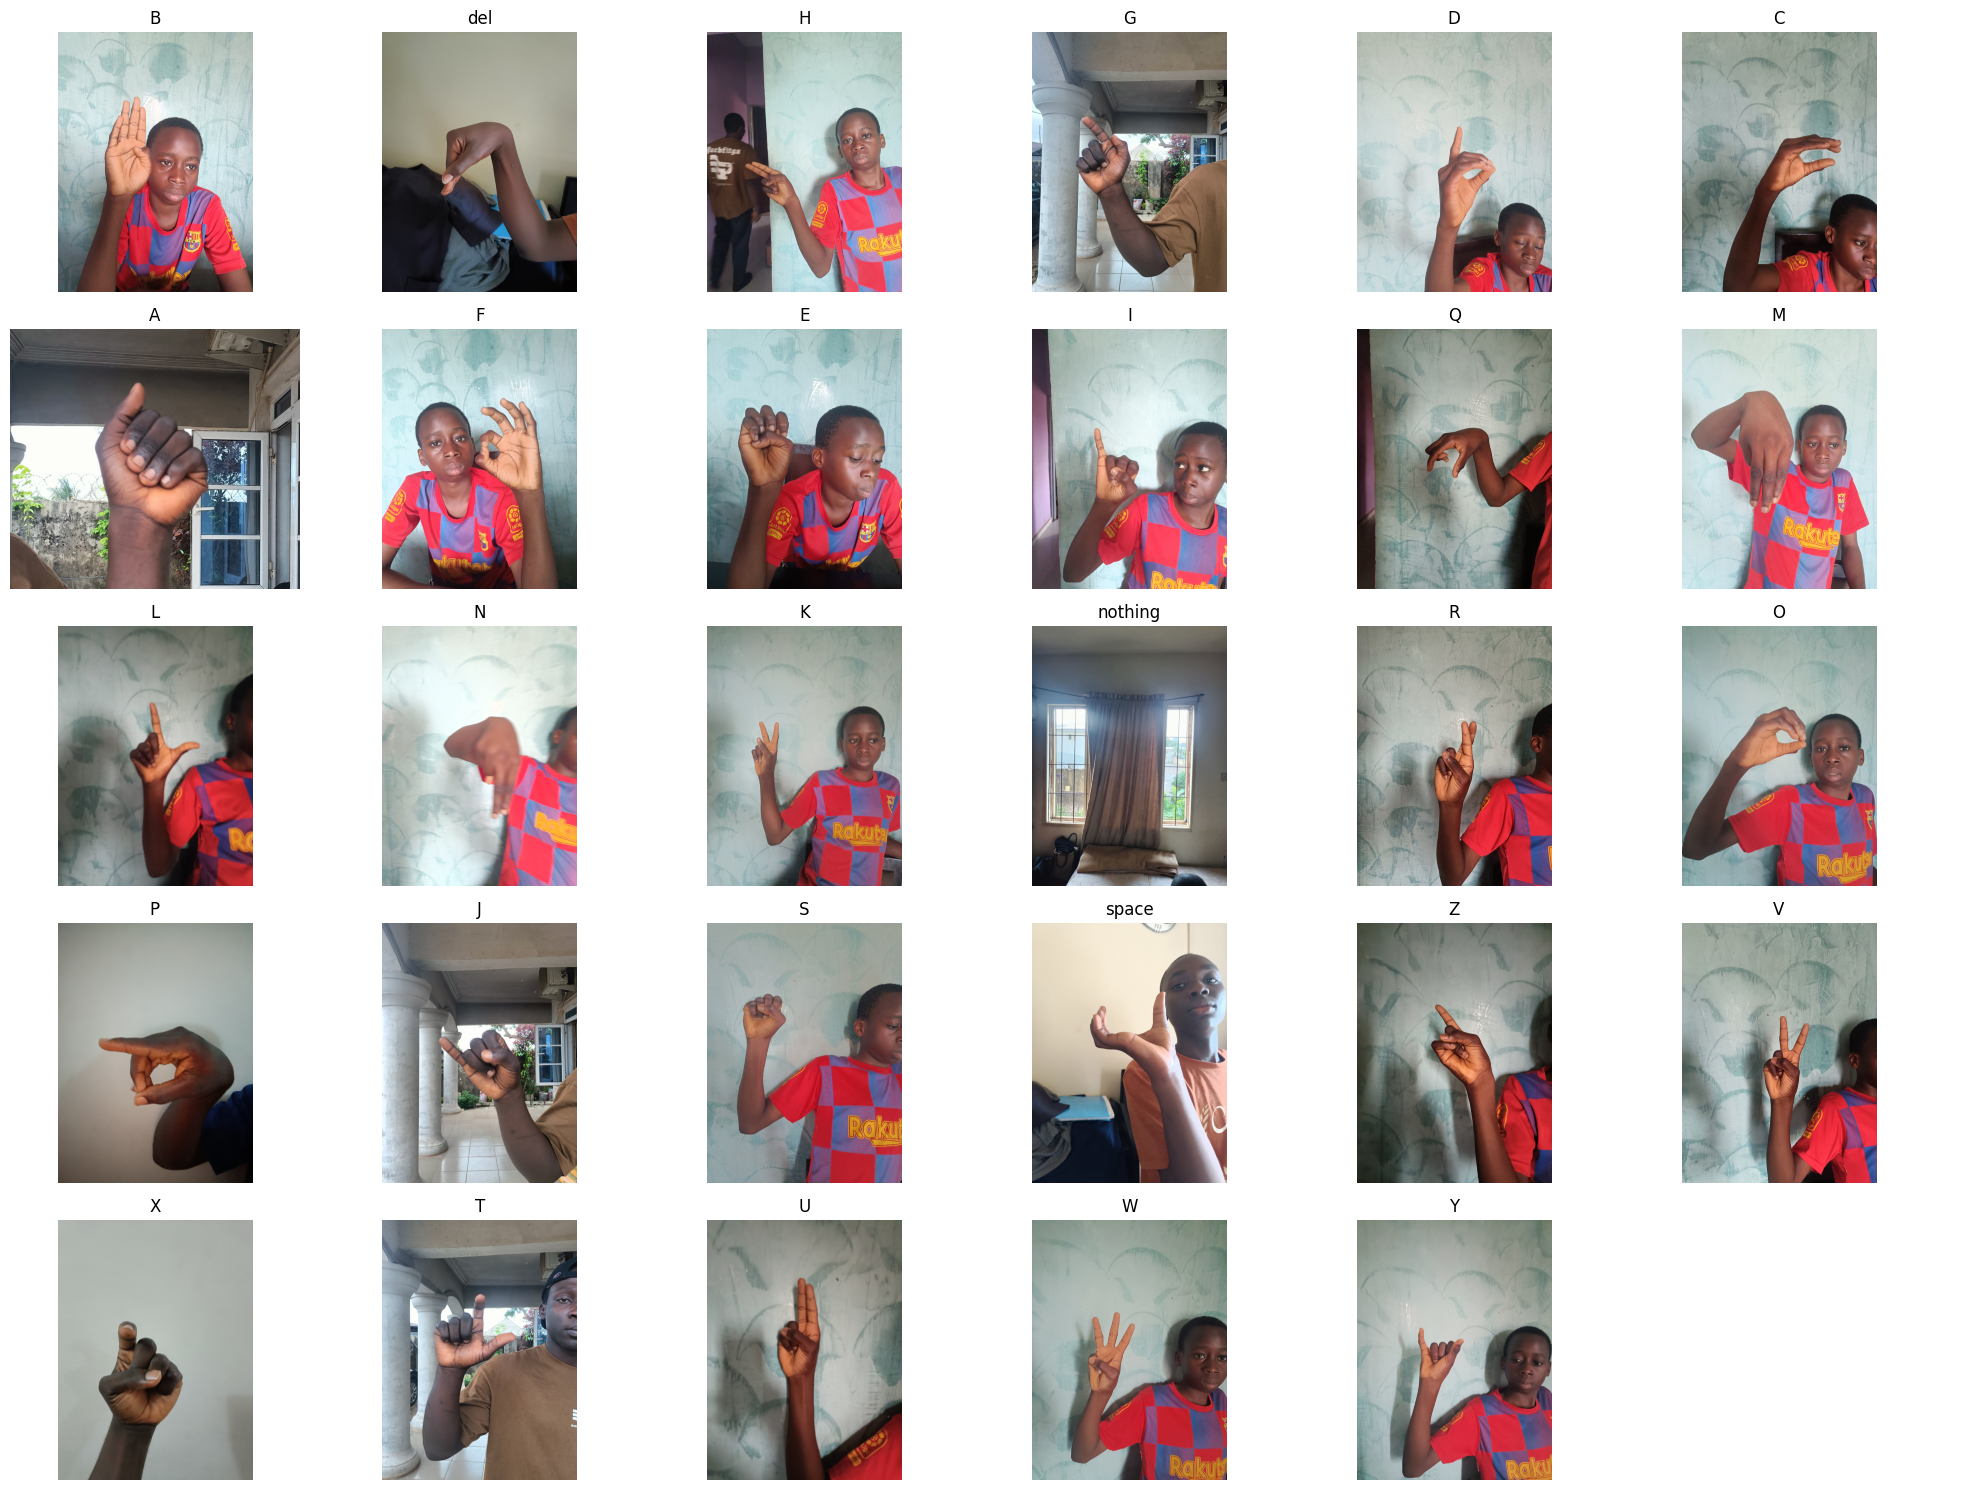

In [ ]:
import matplotlib.pyplot as plt
import cv2
import math

local_data = "/content/drive/MyDrive/Sign Language"
local_categories = os.listdir(local_data)
print(local_categories)

num_categories = len(local_categories)
cols = 6 # Number of columns in the subplot grid
rows = math.ceil(num_categories / cols) # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3)) # Adjust figure size

for i, category in enumerate(local_categories):
    category_path = os.path.join(local_data, category)
    image_files = os.listdir(category_path)
    if image_files:
        first_image_path = os.path.join(category_path, image_files[0])
        img = cv2.imread(first_image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols] # Get the correct axis
        ax.imshow(img_rgb)
        ax.set_title(category)
        ax.axis('off')

# Hide any unused subplots
for j in range(num_categories, rows * cols):
    ax = axes[j // cols, j % cols] if rows > 1 else axes[j % cols]
    ax.axis('off')


plt.tight_layout()
plt.show()

## Combine Datasets


Count the number of images in each category of the local dataset by iterating through the directories and counting files, then store and print the counts.



In [ ]:
image_counts = {}
for category in local_categories:
    category_path = os.path.join(local_data, category)
    if os.path.isdir(category_path):
        image_files = os.listdir(category_path)
        image_counts[category] = len(image_files)

print(image_counts)

{'B': 21, 'del': 45, 'H': 28, 'G': 42, 'D': 23, 'C': 25, 'A': 61, 'F': 95, 'E': 23, 'I': 27, 'Q': 31, 'M': 39, 'L': 38, 'N': 14, 'K': 35, 'nothing': 31, 'R': 35, 'O': 96, 'P': 67, 'J': 40, 'S': 37, 'space': 39, 'Z': 15, 'V': 34, 'X': 44, 'T': 34, 'U': 36, 'W': 27, 'Y': 39}


In [ ]:
import random

kaggle_subset_paths = {}
for category in categories:
    category_path = os.path.join(train_data_path, category)
    if os.path.isdir(category_path):
        image_files = os.listdir(category_path)
        num_available = len(image_files)

        num_to_select = 0
        if category in image_counts:
            num_to_select = max(0, 120 - image_counts[category])
        else:
             # If category not in Roboflow, select up to 120 images from Kaggle
             num_to_select = min(120, num_available)

        selected_files = random.sample(image_files, min(num_to_select, num_available))
        kaggle_subset_paths[category] = [os.path.join(category_path, f) for f in selected_files]

print(kaggle_subset_paths)

print("Number of selected images from Kaggle per category:")
for category, paths in kaggle_subset_paths.items():
    print(f"{category}: {len(paths)}")

{'N': ['/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N/N372.jpg', '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N/N883.jpg', '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N/N871.jpg', '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N/N1894.jpg', '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N/N2438.jpg', '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N/N2244.jpg', '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N/N1918.jpg', '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N/N1595.jpg', '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N/N120.jpg', '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N/N838.jpg', '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N/N2158.jpg', '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/N/N1018.jpg', '/kaggle/input/asl-alphabet/asl_alphab

Merge the Kaggle subset with the local dataset by copying images from both sources into a new combined directory structure.



In [ ]:
import shutil

combined_data_path = "/content/combined_dataset"
os.makedirs(combined_data_path, exist_ok=True)

# Copy Kaggle images
for key, paths in kaggle_subset_paths.items():
    combined_category_path = os.path.join(combined_data_path, key)
    os.makedirs(combined_category_path, exist_ok=True)
    for path in paths:
        shutil.copy(path, combined_category_path)

# Copy original Roboflow images
local_data_path = "/content/drive/MyDrive/Sign Language"
for category in os.listdir(local_data_path):
    local_data_category_path = os.path.join(local_data_path, category)
    combined_category_path = os.path.join(combined_data_path, category)
    os.makedirs(combined_category_path, exist_ok=True)
    for image_file in os.listdir(local_data_category_path):
        shutil.copy(os.path.join(local_data_category_path, image_file), combined_category_path)

print(f"Combined dataset created at: {combined_data_path}")

Combined dataset created at: /content/combined_dataset


Verify combined dataset for training



In [ ]:
print("Directories in combined dataset:")
combined_categories = os.listdir(combined_data_path)
print(combined_categories)

combined_image_counts = {}
for category in combined_categories:
    category_path = os.path.join(combined_data_path, category)
    if os.path.isdir(category_path):
        image_files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]
        combined_image_counts[category] = len(image_files)

print("\nImage counts per category in combined dataset:")
for category, count in combined_image_counts.items():
    print(f"{category}: {count}")

Directories in combined dataset:
['L', 'S', 'N', 'X', 'I', 'V', 'C', 'J', 'W', 'del', 'F', 'P', 'A', 'H', 'Q', 'R', 'G', 'M', 'nothing', 'E', 'D', 'Y', 'U', 'O', 'Z', 'space', 'K', 'T', 'B']

Image counts per category in combined dataset:
L: 120
S: 120
N: 120
X: 120
I: 120
V: 120
C: 120
J: 120
W: 120
del: 120
F: 120
P: 120
A: 120
H: 120
Q: 120
R: 120
G: 120
M: 120
nothing: 120
E: 120
D: 120
Y: 120
U: 120
O: 120
Z: 120
space: 120
K: 120
T: 120
B: 120


['L', 'S', 'N', 'X', 'I', 'V', 'C', 'J', 'W', 'del', 'F', 'P', 'A', 'H', 'Q', 'R', 'G', 'M', 'nothing', 'E', 'D', 'Y', 'U', 'O', 'Z', 'space', 'K', 'T', 'B']


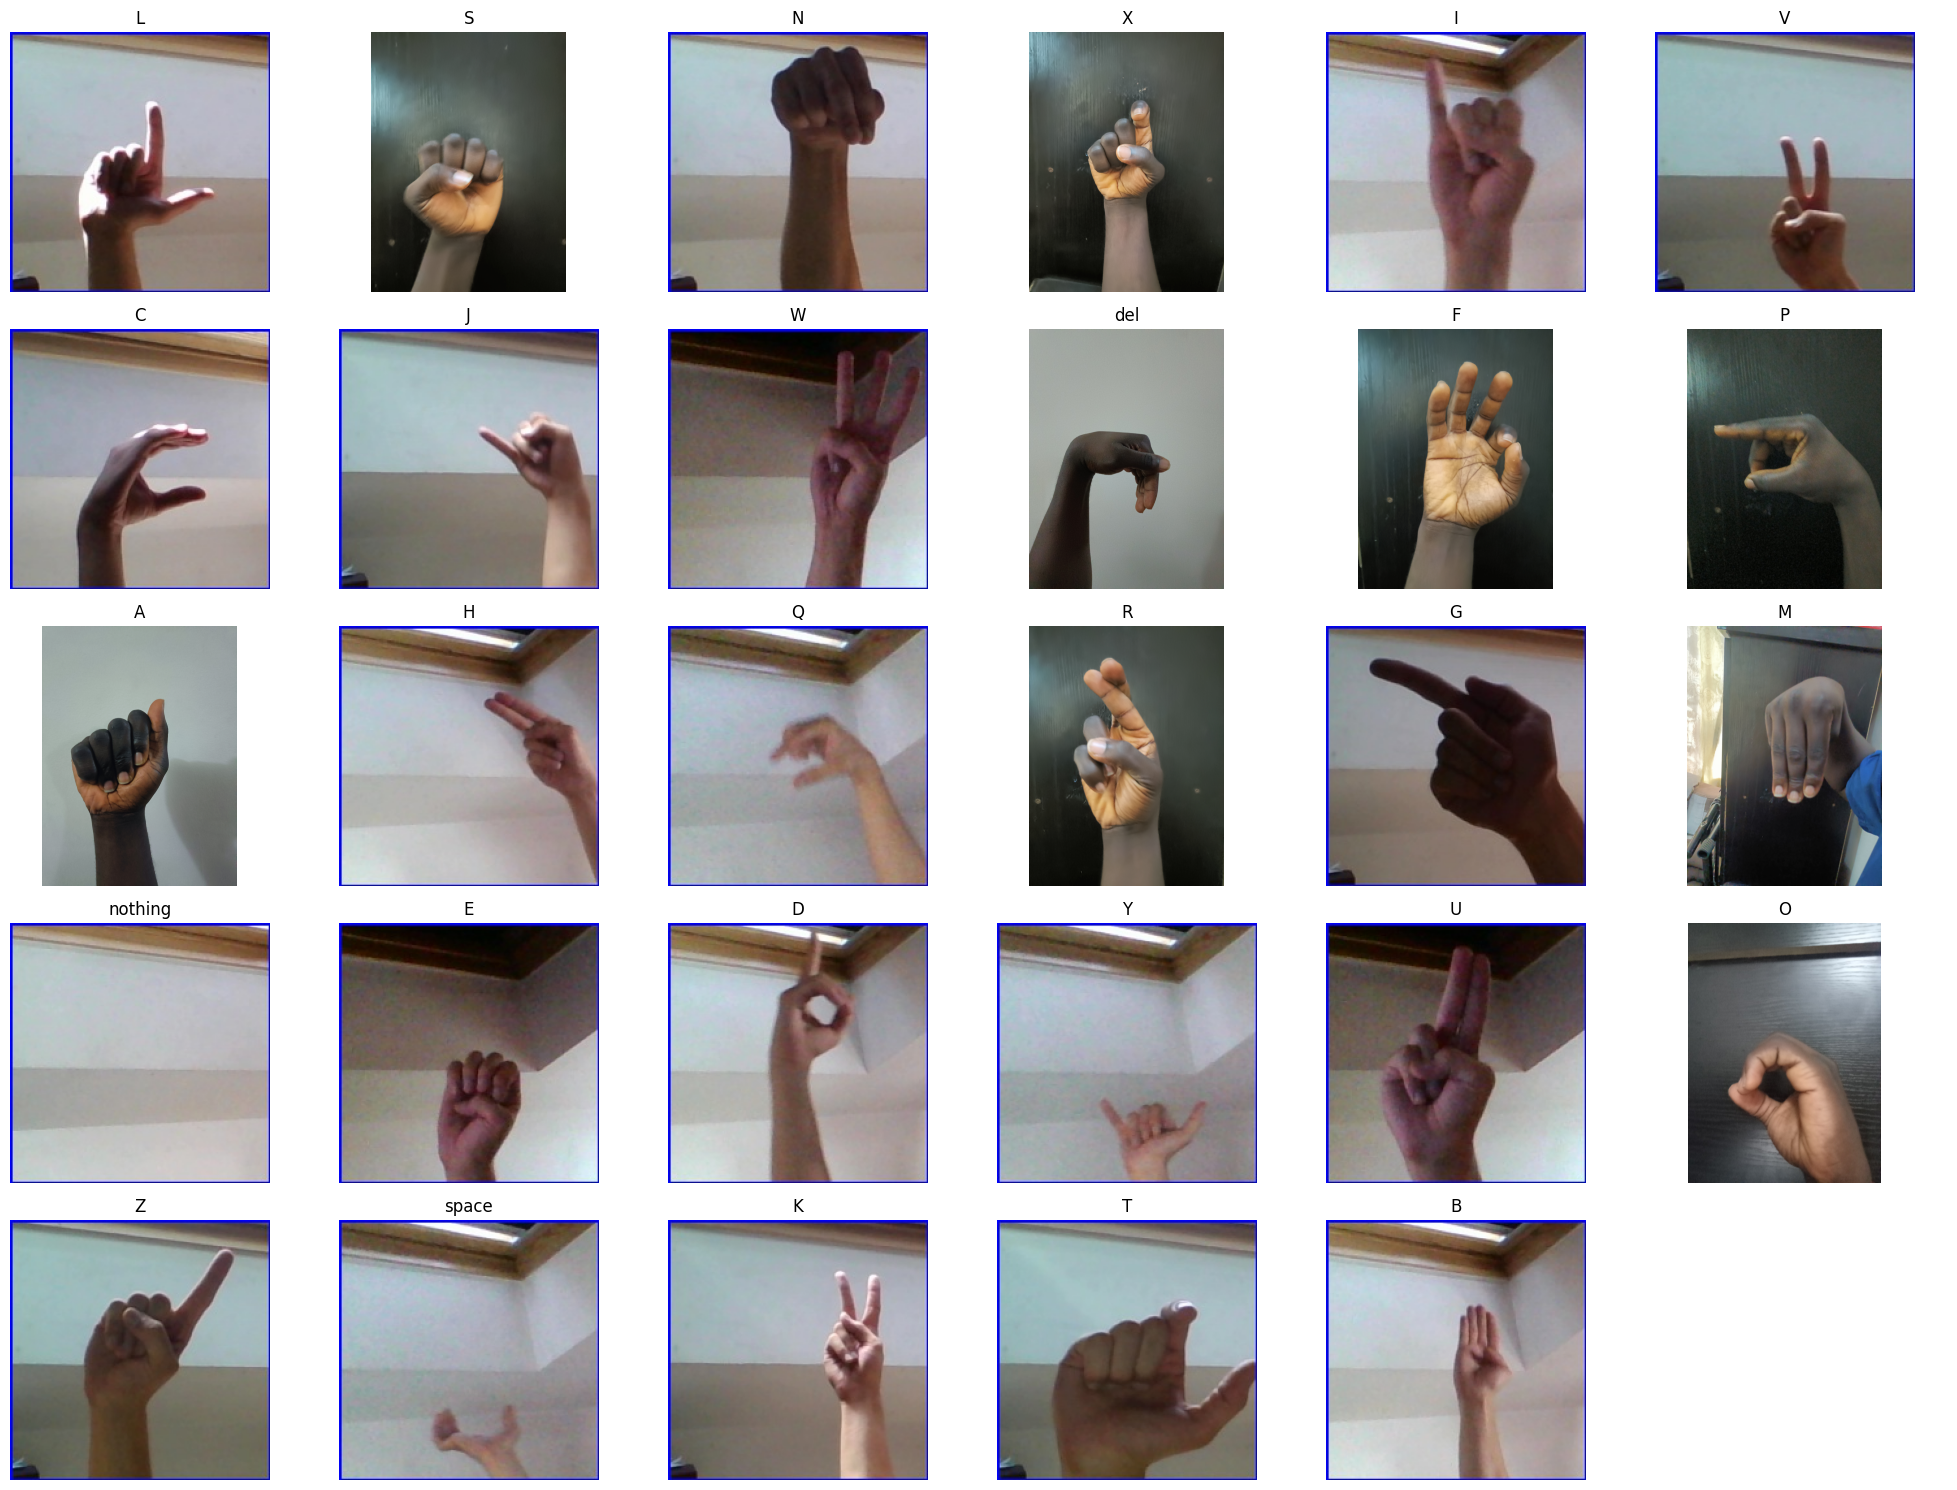

In [ ]:
import matplotlib.pyplot as plt
import cv2
import math

local_data = "/content/combined_dataset"
local_categories = os.listdir(local_data)
print(local_categories)

num_categories = len(local_categories)
cols = 6 # Number of columns in the subplot grid
rows = math.ceil(num_categories / cols) # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3)) # Adjust figure size

for i, category in enumerate(local_categories):
    category_path = os.path.join(local_data, category)
    image_files = os.listdir(category_path)
    if image_files:
        first_image_path = os.path.join(category_path, image_files[0])
        img = cv2.imread(first_image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols] # Get the correct axis
        ax.imshow(img_rgb)
        ax.set_title(category)
        ax.axis('off')

# Hide any unused subplots
for j in range(num_categories, rows * cols):
    ax = axes[j // cols, j % cols] if rows > 1 else axes[j % cols]
    ax.axis('off')


plt.tight_layout()
plt.show()

# Preprocess the dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

# Training data generator with augmentations and grayscale
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,  # 80/20 train/val split

)

# Validation generator (no augmentation, just rescale and grayscale)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,

)

train_data = train_datagen.flow_from_directory(
    combined_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',

    shuffle=True,
)

# Validation subset
val_data = val_datagen.flow_from_directory(
    combined_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
)

Found 2784 images belonging to 29 classes.
Found 696 images belonging to 29 classes.


In [ ]:
train_data.class_indices.keys()

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'])

# Model Building

In [ ]:
from tensorflow.keras.applications import MobileNet

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=img_size + (3,))

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Add new layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_data.num_classes, activation='softmax', kernel_regularizer=l2(0.01))(x) # Added L2 regularization

# Create the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# # Freeze all layers in the base model initially
base_model.trainable = True

# Unfreeze only the last 10 layers
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model with a reduced learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 16,081,629 (61.35 MB)

 Trainable params: 14,440,989 (55.09 MB)

 Non-trainable params: 1,640,640 (6.26 MB)

# Train the model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# EarlyStopping: Stop training when validation loss stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,             # reduce LR by this factor
    patience=3,             # wait 3 epochs before reducing
    min_lr=1e-6,            # lower bound on learning rate
    verbose=1
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.0901 - loss: 4.8332 - val_accuracy: 0.1940 - val_loss: 3.3275 - learning_rate: 1.0000e-04
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.2685 - loss: 3.1146 - val_accuracy: 0.3520 - val_loss: 2.8852 - learning_rate: 1.0000e-04
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.4068 - loss: 2.5020 - val_accuracy: 0.4253 - val_loss: 2.5455 - learning_rate: 1.0000e-04
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.5223 - loss: 2.0735 - val_accuracy: 0.4511 - val_loss: 2.5833 - learning_rate: 1.0000e-04
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.6089 - loss: 1.7510 - val_accuracy: 0.5546 - val_loss: 2.0871 - learning_rate: 1.0000e-04
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.6811 - loss: 1.4801 - val_accuracy: 0.5359 - val_loss: 2.4000 - learning_rate: 1.0000e-04
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7084 

# Evaluate dataset

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

test_data = test_datagen.flow_from_directory(
    combined_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Now evaluate the model with the corrected test data generator
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
model.save("/content/drive/MyDrive/Sign_Language_Models/sign_model-8-new_data.keras")

# Evaluate training process


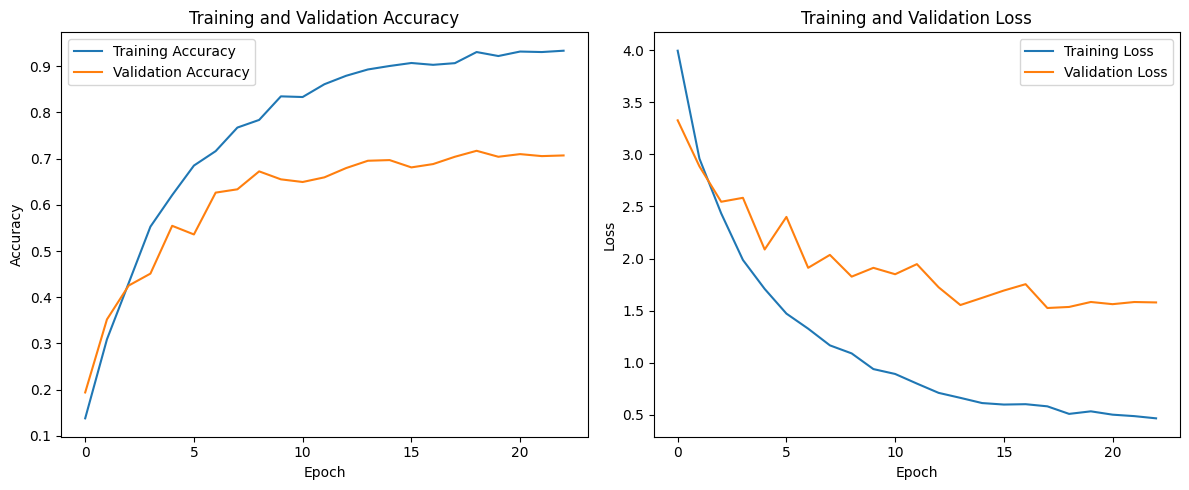

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()